In [1]:
# Select image to pass through pipeline. With path=None, the user will be prompted to select an image. insert a local image path to skip prompt.

from pipeline_utils.img_selector import img_selector
selector = img_selector(path=None)
image = selector.select_image()

Selected image path: D:/leroy-salmon-data/rapport_bilder/example_melanin-blood.webp


In [2]:
# Binary classifier step. Image will be approved for next step or rejected as too poor quality. 

from binary_classifier.evaluator import BinaryClassifierEvaluator
from pipeline_utils.result_saver import ResultSaver
binary_evaluator = BinaryClassifierEvaluator(image)
binary_classifier_result = binary_evaluator.evaluate()

if binary_classifier_result == 1:
    print("Image approved for next step.")
else:
    print("Image rejected as too poor quality")
    saver = ResultSaver(image)
    dict = saver.createResultDict(False, None)
    saver.saveToCSV(dict)

Prediction: Good with 99.9% confidence
Image approved for next step.


Input shape: (1, 3, 512, 256)
Preprocessed shape: (3, 512, 256)
Model checkpoint from epoch: 34
Unique values in spot_prediction in combineResults: [0 1 2]
Number of pixels classified as blood in spot_prediction mask: 345
Number of pixels classified as melanin in spot_prediction mask: 1736
Unique values in result: [0 1 2 3 4 5]
Result tensor type: <class 'numpy.ndarray'>, shape: (512, 256), dtype: int64


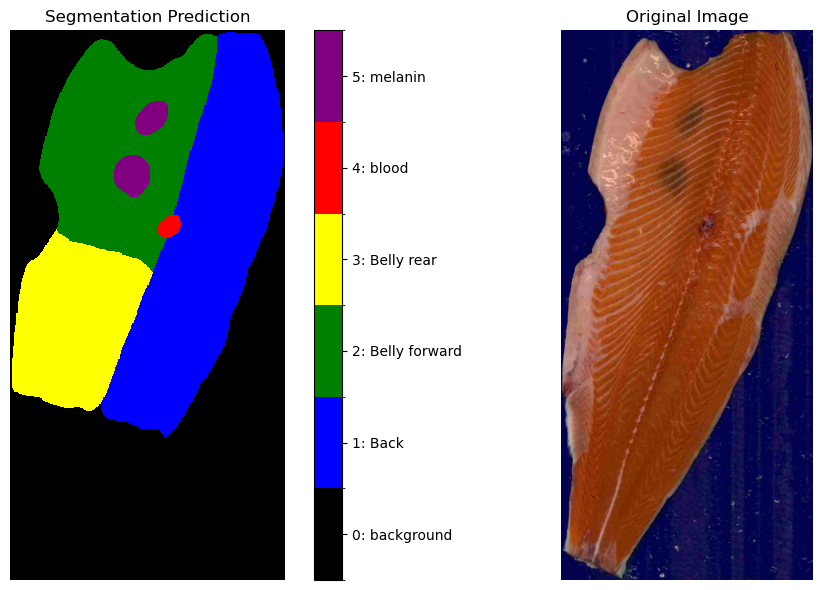

Input shape: (1, 3, 512, 256)
Preprocessed shape: (3, 512, 256)
Model checkpoint from epoch: 34
Input shape: (3, 512, 256)
Preprocessed shape: (3, 512, 256)
Model checkpoint from epoch: 34
Unique values in spot_prediction in combineResults: [0 1 2]
Number of pixels classified as blood in spot_prediction mask: 345
Number of pixels classified as melanin in spot_prediction mask: 1736
Unique values in result: [0 1 2 3 4 5]
Result tensor type: <class 'numpy.ndarray'>, shape: (512, 256), dtype: int64
Overlap zones blood ['Rygg', 'Buk foran']
Overlap zones melanin ['Buk foran']
Class 0 count: 62899 pixels
Class 1 count: 29524 pixels
Class 2 count: 21456 pixels
Class 3 count: 15112 pixels
Class 4 count: 345 pixels
Class 5 count: 1736 pixels


In [3]:
# Segmentation step

from Segmentation.classes.Result_util import ResultUtil

if binary_classifier_result == 1:
    
    util = ResultUtil('Segmentation/saved_models/saved_segm_model.pth')
    result = util.pipeline_prediction(image)

In [4]:
# Saving segmentation result to CSV

if binary_classifier_result == 1:
 
    saver = ResultSaver(image)
    dict = saver.createResultDict(True, result)
    saver.saveToCSV(dict)

Image segmentation results saved to results.csv
